# DSC 540
# Week 11&12
# Author: Muthukumar Kadhirvel
# 5/30/2022

# Milestone 5

In [120]:
# Import Necessary Libraries
import sqlite3
import pandas as pd
import csv
import matplotlib as plt

In [ ]:
# Load csv source data into CSV_TABLE
con = sqlite3.connect("moviesdb")
c = con.cursor()
c.execute("CREATE TABLE IF NOT EXISTS CSV_TABLE (TITLE TEXT PRIMARY KEY, RELEASE_DATE TEXT, BUDGET INTEGER, REVENUE INTEGER, RUNTIME INTEGER, RATING INTEGER, VOTES INTEGER, LANGUAGE TEXT);")
reader = csv.reader(open('csv_source.csv', 'r'))
next(reader)
for row in reader:
    to_db = [row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8]]
    c.execute("INSERT INTO CSV_TABLE VALUES (?, ?, ?, ?, ?, ?, ?, ?);", to_db)
con.commit()
c.close()

In [121]:
# Load api source data into API_TABLE
con = sqlite3.connect("moviesdb")
c = con.cursor()
c.execute("CREATE TABLE IF NOT EXISTS API_TABLE (TITLE TEXT PRIMARY KEY, YEAR INTEGER, RUNTIME INTEGER, LANGUAGE TEXT, COUNTRY TEXT, RATING INTEGER, VOTES INTEGER);")
reader = csv.reader(open('api_source.csv', 'r', encoding="utf8"))
next(reader)
for row in reader:
    to_db = [row[1], row[2], row[3], row[8], row[9], row[10], row[11]]
    c.execute("INSERT INTO API_TABLE VALUES (?, ?, ?, ?, ?, ?, ?);", to_db)
con.commit()
c.close()

In [122]:
# Load web source data into WEB_TABLE
con = sqlite3.connect("moviesdb")
c = con.cursor()
c.execute("CREATE TABLE IF NOT EXISTS WEB_TABLE (TITLE TEXT PRIMARY KEY, COUNTRY TEXT, LANGUAGE TEXT, YEAR INTEGER, REVENUE INTEGER);")
reader = csv.reader(open('web_source.csv', 'r', encoding="utf8"))
next(reader)
for row in reader:
    to_db = [row[2], row[3], row[4], row[5], row[6]]
    c.execute("INSERT INTO WEB_TABLE VALUES (?, ?, ?, ?, ?);", to_db)
con.commit()
c.close()

In [155]:
# Display the first 10 entries of the three tables
con = sqlite3.connect("moviesdb")
c = con.cursor()
print('First 10 entries of API_TABLE')
print('-----------------------------')
for row in c.execute("SELECT * FROM API_TABLE LIMIT 10"):
    print(row)
print('First 10 entries of CSV_TABLE')
print('-----------------------------')
for row in c.execute("SELECT * FROM CSV_TABLE LIMIT 10"):
    print(row)
print('First 10 entries of WEB_TABLE')
print('-----------------------------')
for row in c.execute("SELECT * FROM WEB_TABLE LIMIT 10"):
    print(row)
c.close()

First 10 entries of API_TABLE
-----------------------------
('A.A.A. Massaggiatrice bella presenza offresi...', 1972, 85, 'Italian', 'Italy', 5.1, 152)
('A.A.A. Achille', 2003, 82, 'Italian', 'Italy', 6.4, 98)
('AAA, la película: Sin límite en el tiempo', 2010, 90, 'Spanish', 'Mexico', 5.7, 61)
('AAA Championships at Fartown, Huddersfield', 1901, 4, 'None', 'United Kingdom', 5.9, 33)
('Las AAA son las tres armas: Carta abierta de Rodolfo Walsh a la junta militar', 1979, 20, 'Spanish', 'Argentina', 7.8, 25)
('Aa Aaa Ee Eee: Athanu Aame Inthalo Eeme', 2009, 155, 'Telugu', 'India', 'N/A', 16)
('AAB - Punjabi', 2013, 10, 'Punjabi', 'Canada, India', 'N/A', 'N/A')
('Asr E Aab', 2015, 15, 'Urdu', 'Pakistan', 'N/A', 'N/A')
('Aad liyantaqim', 1988, 105, 'Arabic', 'Egypt', 'N/A', 24)
('The AAF Comes of Age', 1945, 26, 'English', 'United States', 'N/A', 'N/A')
First 10 entries of CSV_TABLE
-----------------------------
('Avatar', '12/10/2009', 237000000, 2787965087, 162, 7.2, 11800, 'English')
("

In [156]:
# Join the 3 tables based on TITLE field
con = sqlite3.connect("moviesdb")
c = con.cursor()
select_sql = 'SELECT CSV_TABLE.*, API_TABLE.COUNTRY, WEB_TABLE.REVENUE AS BOXOFFICE FROM CSV_TABLE '
join_sql = 'LEFT JOIN API_TABLE ON CSV_TABLE.TITLE = API_TABLE.TITLE LEFT JOIN WEB_TABLE ON CSV_TABLE.TITLE = WEB_TABLE.TITLE'
sql = select_sql + join_sql
rows = c.execute(sql)
data = []
for row in rows:
    data.append(row)
c.close()
columns = ["Title", "ReleaseDate", "Budget", "Revenue", "Runtime", "Rating", "Votes", "Language", "Country", "Boxoffice(Million$)"]
movie_df = pd.DataFrame(data, columns=columns)
print(movie_df.head())
print('Size of the combined table is',len(movie_df))

                                      Title ReleaseDate     Budget  \
0                                    Avatar  12/10/2009  237000000   
1  Pirates of the Caribbean: At World's End   5/19/2007  300000000   
2                                   Spectre  10/26/2015  245000000   
3                     The Dark Knight Rises   7/16/2012  250000000   
4                               John Carter    3/7/2012  260000000   

      Revenue  Runtime  Rating  Votes Language Country  Boxoffice(Million$)  
0  2787965087      162     7.2  11800  English    None              2847.25  
1   961000000      169     6.9   4500  English    None                  NaN  
2   880674609      148     6.3   4466  English    None                  NaN  
3  1084939099      165     7.6   9106  English    None              1081.14  
4   284139100      132     6.1   2124  English    None                  NaN  
Size of the combined table is 3224


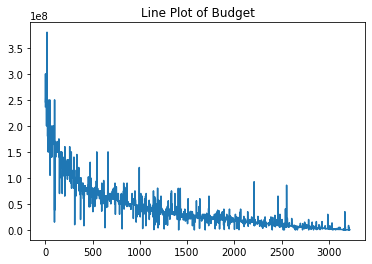

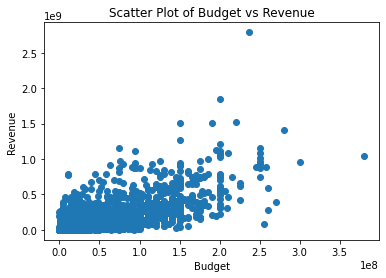

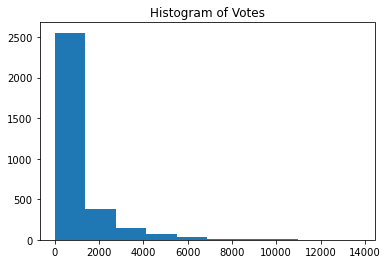

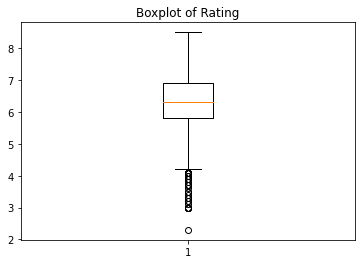

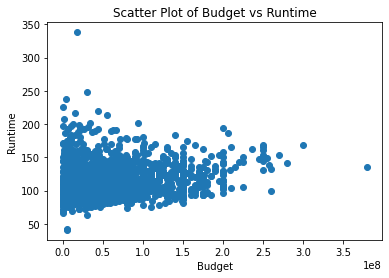

In [157]:
# Create Visualizations
plt.title("Line Plot of Budget")
plt.plot(movie_df.Budget)
plt.show()

plt.title("Scatter Plot of Budget vs Revenue")
plt.scatter(movie_df.Budget,movie_df.Revenue)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

plt.title("Histogram of Votes")
plt.hist(movie_df.Votes)
plt.show()

plt.title("Boxplot of Rating")
plt.boxplot(movie_df.Rating)
plt.show()

plt.title("Scatter Plot of Budget vs Runtime")
plt.scatter(movie_df.Budget,movie_df.Runtime)
plt.xlabel("Budget")
plt.ylabel("Runtime")
plt.show()